In [1]:
import ROOT
import array
import math

Welcome to JupyROOT 6.26/14


In [2]:
canvas = ROOT.TCanvas("canvas", "Fit with Quadratic Polynomial")

In [3]:
def test_func(x, par):
    # 参数par[0]和par[1]表示子函数的参数
    # 参数par[2]表示分段的阈值
    x0 = 1.8
    x1 = 0.8
    if x[0] <= x0 and x[0] >= x1:
        return par[0] + par[1]*x[0]
    elif x[0] > x0:
        return test_func([x0], par)
    else:
        return test_func([x1], par)
testFunc = ROOT.TF1("testFunc", test_func, 0.7, 1000.0, 2)
#fit_func = ROOT.TF1("fitFunc", "[0] + [1]*x", 0.7, 1000.0, 2)
testFunc.SetParameters(0.49171158552965094, 0.38058385932856637)   
new_file = ROOT.TFile("test.root", "recreate")
new_file.cd()
testFunc.Write()
print(testFunc.GetParameter(0))
new_file.Close()

0.49171158552965094


In [4]:
def piecewise_function(x, par):
    # 参数par[0]和par[1]表示子函数的参数
    # 参数par[2]表示分段的阈值
    x0 = 1.8
    x1 = 0.8
    if x[0] <= x0 and x[0] >= x1:
        return par[0] + par[1]*x[0] + par[2]*x[0]*x[0] + par[3]*x[0]*x[0]*x[0] + par[4]*x[0]*x[0]*x[0]*x[0]
    elif x[0] > x0:
        return piecewise_function([x0], par)
    else:
        return piecewise_function([x1], par)

Fit Parameters:
  Parameter 0: 0.5235067291518515
  Parameter 1: 0.3606178274103838
  Parameter 2: 0.14357419574163988
  Parameter 3: 0.012701540952136032
  Parameter 4: -0.03754416763827526
1.3177509453267544
Fit Parameters:
  Parameter 0: 0.4836506130291355
  Parameter 1: 0.3883019808123417
  Parameter 2: 0.1654357362215207
  Parameter 3: 0.013872340181806437
  Parameter 4: -0.049296941555807376
1.2820098781131293
Fit Parameters:
  Parameter 0: 0.49676784670178586
  Parameter 1: 0.3798963562016148
  Parameter 2: 0.15834804411986303
  Parameter 3: 0.013113737701965075
  Parameter 4: -0.04592376601115211
1.2880189430122386
Fit Parameters:
  Parameter 0: 0.5219946725490094
  Parameter 1: 0.363744426281943
  Parameter 2: 0.14486656475517204
  Parameter 3: 0.011652292334700248
  Parameter 4: -0.03973052916701298
1.2969832755756006

****************************************
Minimizer is Minuit / Migrad
Chi2                      =   0.00291487
NDf                       =           15
Edm    

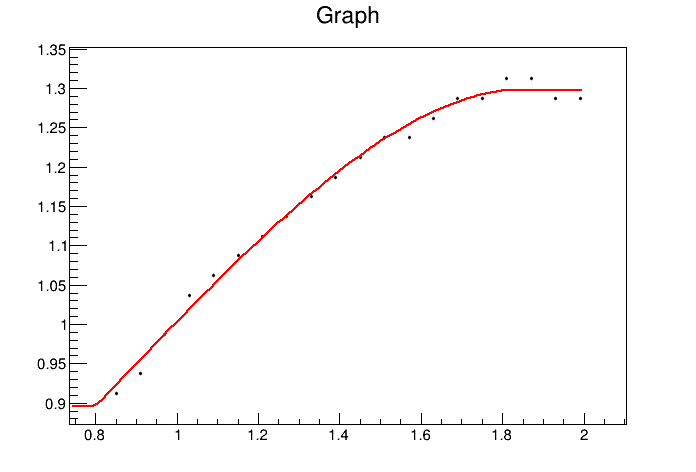

In [5]:
for year in [2015, 2016, 2017, 2018]:
    file = ROOT.TFile.Open("corr_%d.root" % year)
    h1 = file.Get("ecorr_vs_rm")
    h1.Smooth()
    xs = array.array("d")
    ys = array.array("d")
    num = 20
    for i in range(0, num):
        x = 0.85 + i * (2.05 - 0.85) / num
        ymax = 0
        xs.append(x)
        binx = h1.GetXaxis().FindBin(x)
        for j in range(0, h1.GetNbinsY() + 1):
            if h1.GetBinContent(binx, j) > ymax:
                ymax = h1.GetBinContent(binx, j)
                y = h1.GetYaxis().GetBinCenter(j)
        ys.append(y)
    graph = ROOT.TGraph(len(xs), xs, ys)
    #fit_func = ROOT.TF1("fitFunc", "[0] + [1]*x + [2]*x*x + [3]*x*x*x + [4]*x*x*x*x", 0.8, 1.9)
    fit_func = ROOT.TF1("fitFunc", piecewise_function, 0.7, 2.0, 5)
    func = ROOT.TF1("Func", "[0] + [1]*x + [2]*x*x + [3]*x*x*x + [4]*x*x*x*x", 0.8, 1.8)
    #fit_func.SetParameters(/*initial parameters*/)
    graph.Fit(fit_func, "R")
    #fit_func.SetRange(0.8, 1.2)
    canvas.Clear()
    canvas.cd()
    graph.Draw("AP")
    graph.SetMarkerSize(0.4)
    graph.SetMarkerStyle(8)

    fit_func.Draw("same")
    #fit_func.SetRange(0.8, 2.2)
    canvas.Draw()

    print("Fit Parameters:")
    for i in range(fit_func.GetNpar()):
        print(f"  Parameter {i}: {fit_func.GetParameter(i)}")
    print(fit_func(5))
    
    for i in range(0, 5):
        func.SetParameter(i, fit_func.GetParameter(i))
    new_file = ROOT.TFile("./tf/tf_%d.root" % year, "recreate")
    new_file.cd()
    func.Write()
    new_file.Close()

In [45]:
fit_func(1.9) == func(1.9)

False